In [ ]:
#Mapping the Coronavirus Cases in 2020 using Python GeoPandas and ArcGIS
#steps:
#Reading data from webpage
#

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [14]:
#Reading data from webpage
#df=pd.read_html(r'https://www.worldometers.info/coronavirus/')
df=pd.read_csv(r'F:\python\WHO-COVID-19-global-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,03-01-2020,AF,Afghanistan,EMRO,0,0,0,0
1,04-01-2020,AF,Afghanistan,EMRO,0,0,0,0
2,05-01-2020,AF,Afghanistan,EMRO,0,0,0,0
3,06-01-2020,AF,Afghanistan,EMRO,0,0,0,0
4,07-01-2020,AF,Afghanistan,EMRO,0,0,0,0


In [9]:

#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)

In [27]:
df.rename(columns={'Cumulative_cases':'Total cases'},inplace=True)
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Total cases,New_deaths,Cumulative_deaths
0,03-01-2020,AF,Afghanistan,EMRO,0,0,0,0
1,04-01-2020,AF,Afghanistan,EMRO,0,0,0,0
2,05-01-2020,AF,Afghanistan,EMRO,0,0,0,0
3,06-01-2020,AF,Afghanistan,EMRO,0,0,0,0
4,07-01-2020,AF,Afghanistan,EMRO,0,0,0,0


In [29]:
data=df[['Country','Total cases']]

In [31]:
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado

In [16]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [23]:
data.shape

(296724, 2)

In [19]:
world=gpd.read_file(r'F:\python\RS_GIS_Python\Coronavirus Cases March 2020\World_Map.shp')
world.head()

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


<Axes: >

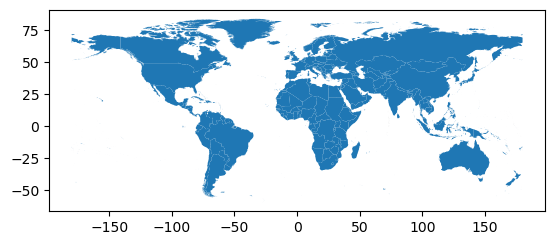

In [20]:
world.plot()

In [32]:
world.rename(columns={'NAME':'Country'},inplace=True)
world.head()

,Country,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [22]:
world.shape

(245, 2)

In [21]:
#checking if the country names are same in data nad world data
for items in data['Country'].toList():
    print(item)

AttributeError: 'Series' object has no attribute 'toList'

In [35]:
m_data=data.merge(world,on='Country')
m_data.head()

,Country,Total cases,geometry
0,Afghanistan,0,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."
1,Afghanistan,0,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."
2,Afghanistan,0,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."
3,Afghanistan,0,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."
4,Afghanistan,0,"POLYGON ((74.91574 37.23733, 74.83221 37.22041..."


In [37]:
m_data.isnull().sum()

Country        0
Total cases    0
geometry       0
dtype: int64